# Generate CSV dataset file

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

from utils import flatten_bbox, get_no_and_multiple_bbox, separate_single_multiple_df, plot_images_conf, absolute_coordinates_bbox

import sys
sys.path.append("../")

from data_pipeline.megadetector.utils import crop_bbox

## French dataset

**Don't forget to generate bounding boxes**.  
Execute the following commands in a compute node:
- `srun --ntasks=1 --gres=gpu:1 --ntasks-per-node=1 --nodes=1 --hint=nomultithread --qos=qos_gpu-dev --account=ads@v100 --cpus-per-task 8 --pty bash`
- `source setup_env.sh`
- `python $LYNX_PROJECT/data_pipeline/megadetector/MegaDetector/detection/run_detector_batch.py $LYNX_PROJECT/data_pipeline/megadetector/md_v5a.0.0.pt "$ALL_CCFRSCRATCH/datasets/extracted/Deep learning lynx - data/0_dataset_raw" /gpfsscratch/rech/ads/commun/datasets/extracted/bbox_france.json --recursive --quiet --include_image_size --threshold 0.5`

In [2]:
DATASET_PATH = "/gpfsscratch/rech/ads/commun/datasets/extracted/Deep learning lynx - data/0_dataset_raw"

In [3]:
individual_folders = os.listdir(DATASET_PATH)

In [4]:
dataset_dict = {
    "filepath": [],
    "lynx_id": [],
    "source": [],
    "pattern": [],
    "date": [],
    "location": [],
    "image_number": []
}

In [5]:
def parse_filename(filename):
    filename = filename.split(".")[0]
    parts = filename.split("_")
    
    return {"id_lynx": parts[0], "source": parts[1], "pattern": parts[2], "date": parts[3], "location": parts[4], "image_number": parts[5]}

In [6]:
for current_directory, _, files in os.walk(DATASET_PATH):
    if "0_dataset_Marie_3_individus" in current_directory :
        continue

    for file in files:
        absolute_path = os.path.abspath(os.path.join(current_directory, file))
        if file.endswith((".txt", ".xlsx", ".db")):
            continue
        if file.startswith(('broken')):
            print(file)
            continue
        if '.ipynb_checkpoints' in absolute_path:
            print(file)
            continue
            
        try:
            parsed_filename = parse_filename(file)
        except:
            print(absolute_path)  # TODO: problem with these filenames
            continue  # skip them
            
        dataset_dict["filepath"].append(absolute_path)
        dataset_dict["lynx_id"].append(parsed_filename["id_lynx"])
        dataset_dict["source"].append(parsed_filename["source"])
        dataset_dict["pattern"].append(parsed_filename["pattern"])
        dataset_dict["date"].append(parsed_filename["date"])
        dataset_dict["location"].append(parsed_filename["location"])
        dataset_dict["image_number"].append(parsed_filename["image_number"])

In [7]:
df_france = pd.DataFrame(dataset_dict)
df_france

filepath   lynx_id source  \
0     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
1     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
2     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
3     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
4     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
...                                                 ...       ...    ...   
3323  /gpfsscratch/rech/ads/commun/datasets/extracte...  679=L192    OFB   
3324  /gpfsscratch/rech/ads/commun/datasets/extracte...  679=L192    OFB   
3325  /gpfsscratch/rech/ads/commun/datasets/extracte...  679=L192    OFB   
3326  /gpfsscratch/rech/ads/commun/datasets/extracte...      1017    OFB   
3327  /gpfsscratch/rech/ads/commun/datasets/extracte...      1017    OFB   

     pattern        date     location image_number  
0         NA  2012-04-27           NA            5  
1         NA  2012-05-05           NA            1  
2         NA  2012-03-17           NA            3  
3         NA  2012-03-16           NA            6  
4         NA  2012-03-05           NA            7  
...      ...         ...          ...          ...  
3323   SPOTS  2015-07-21      Goumois            4  
3324   SPOTS  2015-07-21      Goumois            3  
3325   SPOTS  2015-07-21      Goumois            1  
3326   SPOTS  2017-08-08  Chaux-Neuve            2  
3327   SPOTS  2017-08-08  Chaux-Neuve            1  

[3328 rows x 7 columns]

**Convert the values in the "date" column into datetime**. The format most often found is YYYY-MM-DD but sometimes day and month are reversed. Some other strange dates are also printed (replaced by NaT).
  
**Note**: NA values are replaced by nan values recognised by pd.isna when the csv is saved.

In [8]:
from datetime import datetime

def convert_date(date_str):
    if pd.isna(date_str):
        return None
    try:
        return datetime.strptime(date_str, "%Y-%m-%d")
    except ValueError:
        try:
            return datetime.strptime(date_str, "%Y-%d-%m")
        except ValueError:
            print(date_str)
            return None
        
df_france["date"] = df_france["date"].apply(convert_date)
df_france

NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA
2021
2021-13-13
2021-13-13
NA
NA
NA
NA
NA
NA
NA
NA
NA
NA


filepath   lynx_id source  \
0     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
1     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
2     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
3     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
4     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
...                                                 ...       ...    ...   
3323  /gpfsscratch/rech/ads/commun/datasets/extracte...  679=L192    OFB   
3324  /gpfsscratch/rech/ads/commun/datasets/extracte...  679=L192    OFB   
3325  /gpfsscratch/rech/ads/commun/datasets/extracte...  679=L192    OFB   
3326  /gpfsscratch/rech/ads/commun/datasets/extracte...      1017    OFB   
3327  /gpfsscratch/rech/ads/commun/datasets/extracte...      1017    OFB   

     pattern       date     location image_number  
0         NA 2012-04-27           NA            5  
1         NA 2012-05-05           NA            1  
2         NA 2012-03-17           NA            3  
3         NA 2012-03-16           NA            6  
4         NA 2012-03-05           NA            7  
...      ...        ...          ...          ...  
3323   SPOTS 2015-07-21      Goumois            4  
3324   SPOTS 2015-07-21      Goumois            3  
3325   SPOTS 2015-07-21      Goumois            1  
3326   SPOTS 2017-08-08  Chaux-Neuve            2  
3327   SPOTS 2017-08-08  Chaux-Neuve            1  

[3328 rows x 7 columns]

#### Deleting broken images

In [9]:
all_files_exist = all(df_france['filepath'].apply(os.path.exists))
all_files_exist

True

#### Bounding boxes

In [10]:
with open('/gpfsscratch/rech/ads/commun/datasets/extracted/bbox_france.json', 'r') as f:
    bbox_france = json.load(f)

Some images may not have bounding boxes found.

In [11]:
no_bbox_france, multiple_bbox_france = get_no_and_multiple_bbox(bbox_france)

33 images have no bounding boxes detected.
215 images have several bounding boxes detected.
Total: 3328 images.


Sometimes the length is not identical between `bbox_france` and `df_france`. To do this, we look for differences.

In [12]:
all_file_megadetector = []
for img in bbox_france['images']:
    all_file_megadetector.append(img['file']) 
print(len(all_file_megadetector))

all_file_df_france = df_france['filepath'].to_list()
print(len(all_file_df_france))

3328
3328


In [13]:
set(all_file_df_france) - set(all_file_megadetector)

set()

Back to bbox...

In [14]:
df_bbox_france = flatten_bbox(bbox_france, add_image_without_bbox=True)
df_bbox_france

No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/Deep learning lynx - data/0_dataset_raw/0_dataset_Marie_OCS/OCS_B2101/B2101_OCS_NA_2022-06-20_NA_1.jpg
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/Deep learning lynx - data/0_dataset_raw/0_dataset_Marie_OCS/OCS_Kely/Kely_OCS_NA_NA_NA_5.jpg
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/Deep learning lynx - data/0_dataset_raw/0_dataset_Marie_OFB_ocelles/OFB_OCELLES_1300/1300_OFB_OCELLES_2017-09-07_Giron_4.jpg
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/Deep learning lynx - data/0_dataset_raw/0_dataset_Marie_OFB_ocelles/OFB_OCELLES_1308/1308_OFB_OCELLES_2020-06-26_Champfromier_3.png
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/Deep learning lynx - data/0_dataset_raw/0_dataset_Marie_OFB_ocelles/OFB_OCELLES_1388/1388_OFB_OCELLES_2019-11-12_Mouthier_10.JPG
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/Deep learning lynx - data/0_dataset_raw/0_dataset_Marie_OFB_ocel

file  im_width  im_height  \
0     /gpfsscratch/rech/ads/commun/datasets/extracte...      1467        950   
1     /gpfsscratch/rech/ads/commun/datasets/extracte...      4608       2592   
2     /gpfsscratch/rech/ads/commun/datasets/extracte...      4608       2592   
3     /gpfsscratch/rech/ads/commun/datasets/extracte...      3840       2160   
4     /gpfsscratch/rech/ads/commun/datasets/extracte...      1142        883   
...                                                 ...       ...        ...   
3567  /gpfsscratch/rech/ads/commun/datasets/extracte...      2576       1984   
3568  /gpfsscratch/rech/ads/commun/datasets/extracte...      2048       1536   
3569  /gpfsscratch/rech/ads/commun/datasets/extracte...      2592       2000   
3570  /gpfsscratch/rech/ads/commun/datasets/extracte...      2592       2000   
3571  /gpfsscratch/rech/ads/commun/datasets/extracte...       620        480   

     category   conf        x        y    width  height  
0           1  0.904  0.25760  0.08421  0.48600  0.6726  
1           1  0.958  0.46410  0.41200  0.09092  0.1022  
2           1  0.937  0.20780  0.46060  0.08138  0.1030  
3           1  0.925  0.16790  0.30830  0.37180  0.2865  
4           1  0.960  0.04640  0.09513  0.53590  0.5096  
...       ...    ...      ...      ...      ...     ...  
3567        1  0.936  0.13150  0.41830  0.19480  0.1451  
3568        1  0.951  0.07861  0.42250  0.28270  0.2109  
3569        1  0.953  0.37490  0.35990  0.32630  0.3350  
3570        1  0.958  0.37800  0.47950  0.34680  0.2284  
3571        1  0.942  0.11770  0.06250  0.69830  0.8604  

[3572 rows x 9 columns]

Absolute coordinates of the bounding box (x, y, width and height) based on the image dimensions

In [15]:
df_bbox_france = absolute_coordinates_bbox(df_bbox_france)

df_bbox_france

file  im_width  im_height  \
0     /gpfsscratch/rech/ads/commun/datasets/extracte...      1467        950   
1     /gpfsscratch/rech/ads/commun/datasets/extracte...      4608       2592   
2     /gpfsscratch/rech/ads/commun/datasets/extracte...      4608       2592   
3     /gpfsscratch/rech/ads/commun/datasets/extracte...      3840       2160   
4     /gpfsscratch/rech/ads/commun/datasets/extracte...      1142        883   
...                                                 ...       ...        ...   
3567  /gpfsscratch/rech/ads/commun/datasets/extracte...      2576       1984   
3568  /gpfsscratch/rech/ads/commun/datasets/extracte...      2048       1536   
3569  /gpfsscratch/rech/ads/commun/datasets/extracte...      2592       2000   
3570  /gpfsscratch/rech/ads/commun/datasets/extracte...      2592       2000   
3571  /gpfsscratch/rech/ads/commun/datasets/extracte...       620        480   

     category   conf           x           y       width    height  
0           1  0.904   377.89920    79.99950   712.96200  638.9700  
1           1  0.958  2138.57280  1067.90400   418.95936  264.9024  
2           1  0.937   957.54240  1193.87520   374.99904  266.9760  
3           1  0.925   644.73600   665.92800  1427.71200  618.8400  
4           1  0.960    52.98880    83.99979   611.99780  449.9768  
...       ...    ...         ...         ...         ...       ...  
3567        1  0.936   338.74400   829.90720   501.80480  287.8784  
3568        1  0.951   160.99328   648.96000   578.96960  323.9424  
3569        1  0.953   971.74080   719.80000   845.76960  670.0000  
3570        1  0.958   979.77600   959.00000   898.90560  456.8000  
3571        1  0.942    72.97400    30.00000   432.94600  412.9920  

[3572 rows x 9 columns]

#### 10 images cropped with the least confidence are displayed

Only images with a single bounding box are displayed.

In [16]:
df_bbox_france_single_detection, df_bbox_france_multiple_detections = separate_single_multiple_df(df_bbox_france)

print(len(df_bbox_france_single_detection))
print(len(df_bbox_france_multiple_detections))

3113
459


In [17]:
df_bbox_france_single_detection

file  im_width  im_height  \
0     /gpfsscratch/rech/ads/commun/datasets/extracte...      1467        950   
1     /gpfsscratch/rech/ads/commun/datasets/extracte...      4608       2592   
2     /gpfsscratch/rech/ads/commun/datasets/extracte...      4608       2592   
3     /gpfsscratch/rech/ads/commun/datasets/extracte...      3840       2160   
4     /gpfsscratch/rech/ads/commun/datasets/extracte...      1142        883   
...                                                 ...       ...        ...   
3567  /gpfsscratch/rech/ads/commun/datasets/extracte...      2576       1984   
3568  /gpfsscratch/rech/ads/commun/datasets/extracte...      2048       1536   
3569  /gpfsscratch/rech/ads/commun/datasets/extracte...      2592       2000   
3570  /gpfsscratch/rech/ads/commun/datasets/extracte...      2592       2000   
3571  /gpfsscratch/rech/ads/commun/datasets/extracte...       620        480   

     category   conf           x           y       width    height  
0           1  0.904   377.89920    79.99950   712.96200  638.9700  
1           1  0.958  2138.57280  1067.90400   418.95936  264.9024  
2           1  0.937   957.54240  1193.87520   374.99904  266.9760  
3           1  0.925   644.73600   665.92800  1427.71200  618.8400  
4           1  0.960    52.98880    83.99979   611.99780  449.9768  
...       ...    ...         ...         ...         ...       ...  
3567        1  0.936   338.74400   829.90720   501.80480  287.8784  
3568        1  0.951   160.99328   648.96000   578.96960  323.9424  
3569        1  0.953   971.74080   719.80000   845.76960  670.0000  
3570        1  0.958   979.77600   959.00000   898.90560  456.8000  
3571        1  0.942    72.97400    30.00000   432.94600  412.9920  

[3113 rows x 9 columns]

                                                   file  im_width  im_height  \
2407  /gpfsscratch/rech/ads/commun/datasets/extracte...      1920       1080   
2926  /gpfsscratch/rech/ads/commun/datasets/extracte...       990        734   
570   /gpfsscratch/rech/ads/commun/datasets/extracte...       493        336   
2977  /gpfsscratch/rech/ads/commun/datasets/extracte...      2944       1656   
1775  /gpfsscratch/rech/ads/commun/datasets/extracte...      1280        720   
181   /gpfsscratch/rech/ads/commun/datasets/extracte...      1316        739   
3109  /gpfsscratch/rech/ads/commun/datasets/extracte...       353        284   
1192  /gpfsscratch/rech/ads/commun/datasets/extracte...       615        410   
1196  /gpfsscratch/rech/ads/commun/datasets/extracte...       503        336   
1116  /gpfsscratch/rech/ads/commun/datasets/extracte...       741        926   

     category   conf          x          y     width    height  
2407        1  0.518  730.94400  359.96400  155.9808  

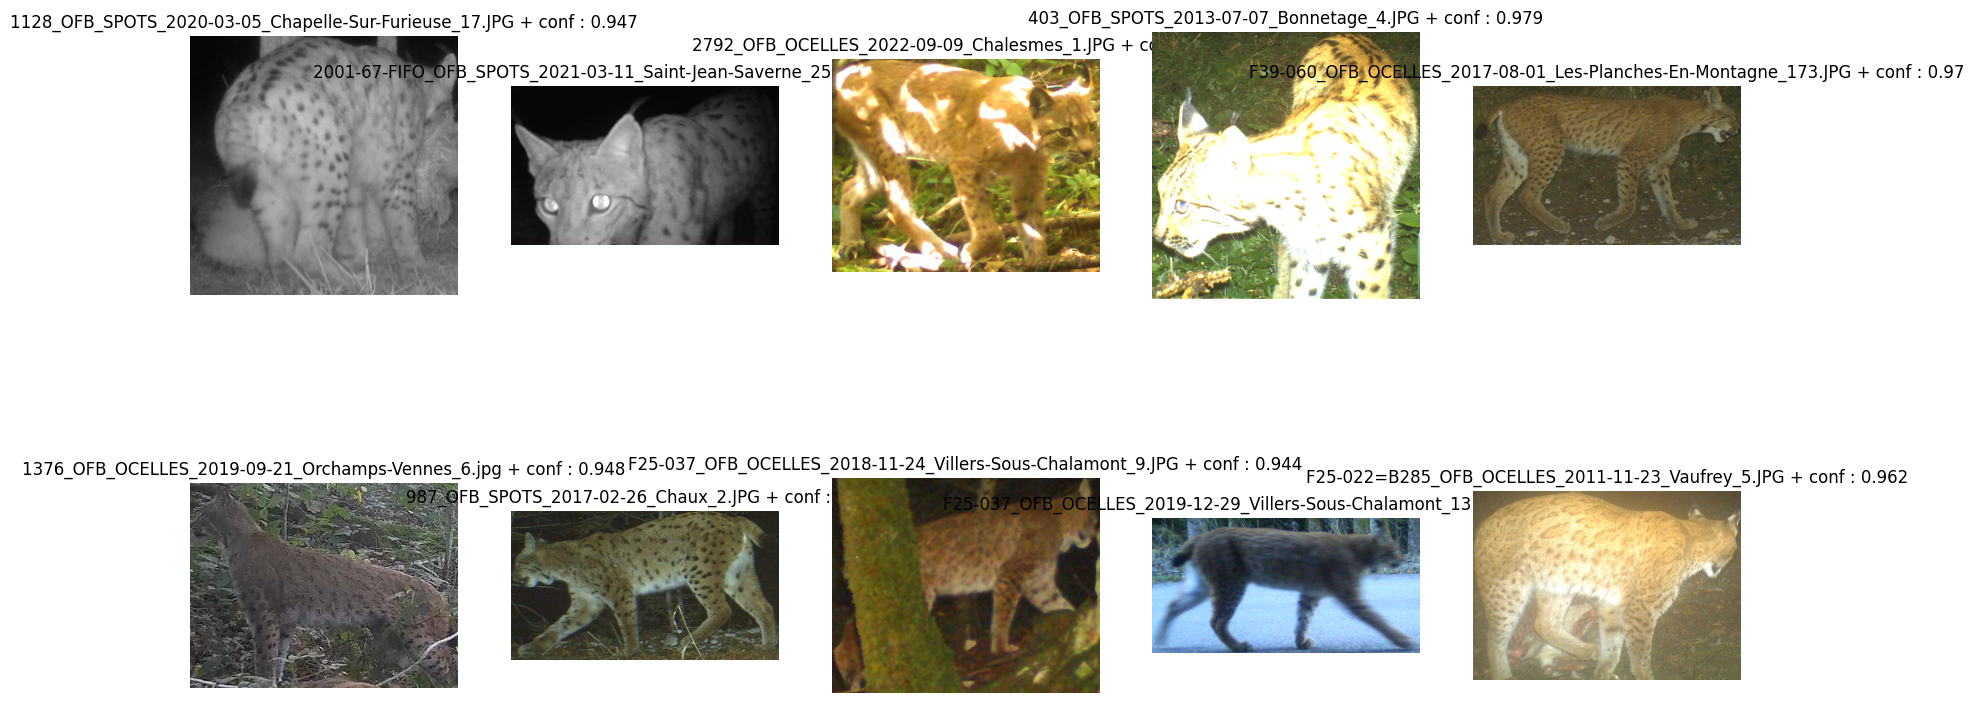

In [18]:
plot_images_conf(df_bbox_france_single_detection, by="smallest")

#### 10 images cropped with the largest confidence are displayed

                                                   file  im_width  im_height  \
1299  /gpfsscratch/rech/ads/commun/datasets/extracte...      2048       1536   
253   /gpfsscratch/rech/ads/commun/datasets/extracte...      1920       1080   
2081  /gpfsscratch/rech/ads/commun/datasets/extracte...      2048       1536   
2436  /gpfsscratch/rech/ads/commun/datasets/extracte...      2576       1984   
822   /gpfsscratch/rech/ads/commun/datasets/extracte...      2592       2000   
927   /gpfsscratch/rech/ads/commun/datasets/extracte...      2592       2000   
1431  /gpfsscratch/rech/ads/commun/datasets/extracte...      2048       1536   
1751  /gpfsscratch/rech/ads/commun/datasets/extracte...      2048       1536   
1755  /gpfsscratch/rech/ads/commun/datasets/extracte...      2048       1536   
2123  /gpfsscratch/rech/ads/commun/datasets/extracte...      2048       1536   

     category   conf           x           y      width     height  
1299        1  0.985  896.000000   665.85600  1147

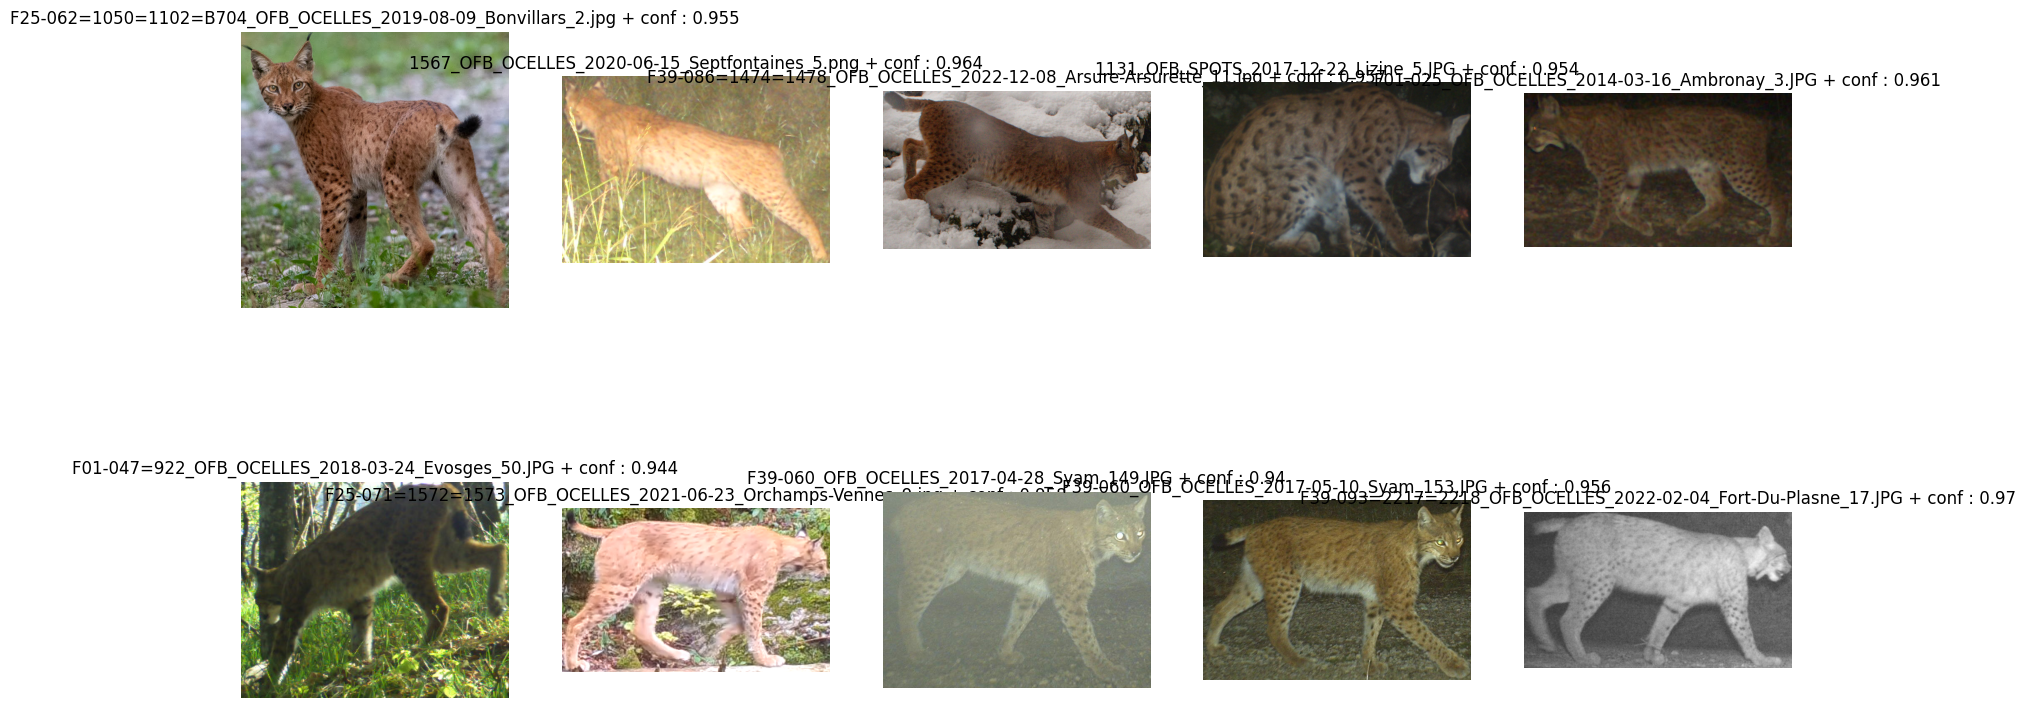

In [19]:
plot_images_conf(df_bbox_france_single_detection, by="largest")

In [19]:
df_france_with_bbox = pd.merge(df_france, df_bbox_france_single_detection[['file', 'conf', 'x', 'y', 'width', 'height']], how='inner', left_on='filepath', right_on='file')
df_france_with_bbox = df_france_with_bbox.drop('file', axis=1)

df_france_with_bbox

filepath   lynx_id source  \
0     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
1     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
2     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
3     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
4     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
...                                                 ...       ...    ...   
3108  /gpfsscratch/rech/ads/commun/datasets/extracte...  679=L192    OFB   
3109  /gpfsscratch/rech/ads/commun/datasets/extracte...  679=L192    OFB   
3110  /gpfsscratch/rech/ads/commun/datasets/extracte...  679=L192    OFB   
3111  /gpfsscratch/rech/ads/commun/datasets/extracte...      1017    OFB   
3112  /gpfsscratch/rech/ads/commun/datasets/extracte...      1017    OFB   

     pattern       date     location image_number   conf          x  \
0         NA 2012-04-27           NA            5  0.938   854.8416   
1         NA 2012-05-05           NA            1  0.894   906.8544   
2         NA 2012-03-17           NA            3  0.939  1192.8384   
3         NA 2012-03-16           NA            6  0.965   834.8832   
4         NA 2012-03-05           NA            7  0.970   765.9080   
...      ...        ...          ...          ...    ...        ...   
3108   SPOTS 2015-07-21      Goumois            4  0.925   668.7360   
3109   SPOTS 2015-07-21      Goumois            3  0.949  1276.8192   
3110   SPOTS 2015-07-21      Goumois            1  0.902   615.8804   
3111   SPOTS 2017-08-08  Chaux-Neuve            2  0.959  1797.7904   
3112   SPOTS 2017-08-08  Chaux-Neuve            1  0.964   869.9152   

              y      width     height  
0     1054.8000   558.8352   289.0000  
1      948.9312   997.7472  1628.8128  
2      821.8000   743.9040   465.8000  
3      673.8000   594.8640   518.8000  
4      315.9860   568.8540   392.9500  
...         ...        ...        ...  
3108  1152.9216  3805.5744  2295.8208  
3109   880.9344  3906.6624  2475.8784  
3110   767.9859  1334.8447   828.8511  
3111   835.8592   470.8928   251.9680  
3112  1065.8048   345.9568   380.9280  

[3113 rows x 12 columns]

#### Bounding box confidence distribution

<Axes: xlabel='conf', ylabel='Count'>

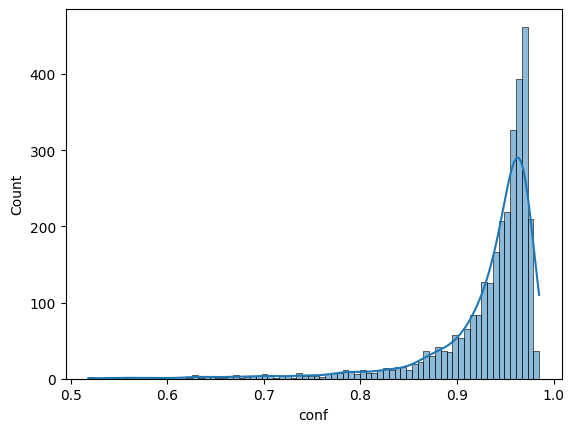

In [20]:
import seaborn as sns

sns.histplot(df_france_with_bbox["conf"], kde=True)

#### Compute `image_number` for each individual

This number is no longer the same as initially following filtering, particularly of images with no bounding box detected, for example.

In [21]:
df_france_with_bbox['image_number'] = df_france_with_bbox.groupby('lynx_id').cumcount() + 1
df_france_with_bbox

filepath   lynx_id source  \
0     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
1     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
2     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
3     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
4     /gpfsscratch/rech/ads/commun/datasets/extracte...  Van-Gogh    OCS   
...                                                 ...       ...    ...   
3108  /gpfsscratch/rech/ads/commun/datasets/extracte...  679=L192    OFB   
3109  /gpfsscratch/rech/ads/commun/datasets/extracte...  679=L192    OFB   
3110  /gpfsscratch/rech/ads/commun/datasets/extracte...  679=L192    OFB   
3111  /gpfsscratch/rech/ads/commun/datasets/extracte...      1017    OFB   
3112  /gpfsscratch/rech/ads/commun/datasets/extracte...      1017    OFB   

     pattern       date     location  image_number   conf          x  \
0         NA 2012-04-27           NA             1  0.938   854.8416   
1         NA 2012-05-05           NA             2  0.894   906.8544   
2         NA 2012-03-17           NA             3  0.939  1192.8384   
3         NA 2012-03-16           NA             4  0.965   834.8832   
4         NA 2012-03-05           NA             5  0.970   765.9080   
...      ...        ...          ...           ...    ...        ...   
3108   SPOTS 2015-07-21      Goumois             2  0.925   668.7360   
3109   SPOTS 2015-07-21      Goumois             3  0.949  1276.8192   
3110   SPOTS 2015-07-21      Goumois             4  0.902   615.8804   
3111   SPOTS 2017-08-08  Chaux-Neuve             1  0.959  1797.7904   
3112   SPOTS 2017-08-08  Chaux-Neuve             2  0.964   869.9152   

              y      width     height  
0     1054.8000   558.8352   289.0000  
1      948.9312   997.7472  1628.8128  
2      821.8000   743.9040   465.8000  
3      673.8000   594.8640   518.8000  
4      315.9860   568.8540   392.9500  
...         ...        ...        ...  
3108  1152.9216  3805.5744  2295.8208  
3109   880.9344  3906.6624  2475.8784  
3110   767.9859  1334.8447   828.8511  
3111   835.8592   470.8928   251.9680  
3112  1065.8048   345.9568   380.9280  

[3113 rows x 12 columns]

In [22]:
df_france_with_bbox.to_csv("/gpfsscratch/rech/ads/commun/datasets/extracted/lynx_dataset_france.csv", index=False)

## Croatian dataset

**Don't forget to generate bounding boxes**.  
Execute the following commands in a compute node:
- `srun --ntasks=1 --gres=gpu:1 --ntasks-per-node=1 --nodes=1 --hint=nomultithread --qos=qos_gpu-dev --account=ads@v100 --cpus-per-task 8 --pty bash`
- `source setup_env.sh`
- `python $LYNX_PROJECT/data_pipeline/megadetector/MegaDetector/detection/run_detector_batch.py $LYNX_PROJECT/data_pipeline/megadetector/md_v5a.0.0.pt "$ALL_CCFRSCRATCH/datasets/extracted/croatia/lynx_pic" /gpfsscratch/rech/ads/commun/datasets/extracted/croatia/bbox_croatia.json --recursive --quiet --include_image_size --threshold 0.5`

In [23]:
df_croatia = pd.read_excel("/gpfsscratch/rech/ads/commun/datasets/extracted/croatia/list_of_lynx_photos1.xlsx")
df_croatia

datum_vrijeme  pouzdanost  broj_zivotinja  broj_mladih  \
0    2016-05-19 01:15:00           1               1            0   
1    2016-10-22 03:18:00           1               1            0   
2    2016-10-23 11:35:00           1               1            0   
3    2013-12-10 10:21:00           1               1            0   
4    2014-09-13 17:49:00           1               1            0   
...                  ...         ...             ...          ...   
2007 2023-05-13 18:06:00           1               1            0   
2008 2022-04-05 05:31:00           1               1            0   
2009 2023-10-20 06:40:00           1               2            1   
2010 2023-10-20 06:40:00           1               2            1   
2011 2023-11-06 07:19:00           1               1            0   

                                      img                      oznaka    ime  \
0                     lynx/photos/RIS.JPG               Varošina 2016  Image   
1                lynx/photos/PICT0290.JPG               Goran ZIP L09  Image   
2        lynx/photos/PICT0310_GfUlKy6.JPG               Goran ZIP L09  Image   
3                lynx/photos/PICT0236.JPG                     Pakleni  Image   
4        lynx/photos/PICT0001_8J6PCAA.JPG                         Nik  Image   
...                                   ...                         ...    ...   
2007             lynx/photos/B1000363.JPG                  Slavko L35  Image   
2008     lynx/photos/PICT0082_8hHOzSQ.JPG                       Vilim  Image   
2009  lynx/photos/IMG-20231112-WA0007.jpg  Crno jezero2 mladunac 2023  Image   
2010  lynx/photos/IMG-20231112-WA0007.jpg               Crno jezero 2  Image   
2011  lynx/photos/IMG-20231112-WA0012.jpg               Crno jezero 2  Image   

                      naziv     spol                             lokacija  \
0          Geonatura d.o.o.  Unknown          POINT (15.439715 44.630702)   
1                JU Priroda        M  POINT (14.9107031584 45.2327798187)   
2                JU Priroda        M  POINT (14.9107031584 45.2327798187)   
3              NP Paklenica  Unknown  POINT (15.4829004594 44.3279410748)   
4              NP Paklenica  Unknown  POINT (15.4792073827 44.3398982543)   
...                     ...      ...                                  ...   
2007  Veterinarski fakultet        M          POINT (14.949509 45.144032)   
2008             PP Velebit        M          POINT (15.043362 44.881497)   
2009  Veterinarski fakultet  Unknown           POINT (15.24886 44.828308)   
2010  Veterinarski fakultet        Z           POINT (15.24886 44.828308)   
2011  Veterinarski fakultet        Z           POINT (15.24886 44.828308)   

     slikana_strana_zivotinje        lat        lon  
0                       right  15.439715  44.630702  
1                        left  14.910703  45.232780  
2                       right  14.910703  45.232780  
3                        none  15.482900  44.327941  
4                        left  15.479207  44.339898  
...                       ...        ...        ...  
2007                     left  14.949509  45.144032  
2008                     left  15.043362  44.881497  
2009                     left  15.248860  44.828308  
2010                     left  15.248860  44.828308  
2011                     left  15.248860  44.828308  

[2012 rows x 13 columns]

#### Column renaming

In [24]:
names = {
    "datum_vrijeme": "date",
    "img": "filepath",
    "oznaka": "lynx_id",
    "spol": "sex",
    "lat": "latitude",
    "lon": "longitude",
    "slikana_strana_zivotinje": "side",
    "broj_zivotinja": "number_animals",
    "broj_mladih": "number_children",
    "naziv": "source", # doubt
}

df_croatia.rename(columns=names, inplace=True)
df_croatia

date  pouzdanost  number_animals  number_children  \
0    2016-05-19 01:15:00           1               1                0   
1    2016-10-22 03:18:00           1               1                0   
2    2016-10-23 11:35:00           1               1                0   
3    2013-12-10 10:21:00           1               1                0   
4    2014-09-13 17:49:00           1               1                0   
...                  ...         ...             ...              ...   
2007 2023-05-13 18:06:00           1               1                0   
2008 2022-04-05 05:31:00           1               1                0   
2009 2023-10-20 06:40:00           1               2                1   
2010 2023-10-20 06:40:00           1               2                1   
2011 2023-11-06 07:19:00           1               1                0   

                                 filepath                     lynx_id    ime  \
0                     lynx/photos/RIS.JPG               Varošina 2016  Image   
1                lynx/photos/PICT0290.JPG               Goran ZIP L09  Image   
2        lynx/photos/PICT0310_GfUlKy6.JPG               Goran ZIP L09  Image   
3                lynx/photos/PICT0236.JPG                     Pakleni  Image   
4        lynx/photos/PICT0001_8J6PCAA.JPG                         Nik  Image   
...                                   ...                         ...    ...   
2007             lynx/photos/B1000363.JPG                  Slavko L35  Image   
2008     lynx/photos/PICT0082_8hHOzSQ.JPG                       Vilim  Image   
2009  lynx/photos/IMG-20231112-WA0007.jpg  Crno jezero2 mladunac 2023  Image   
2010  lynx/photos/IMG-20231112-WA0007.jpg               Crno jezero 2  Image   
2011  lynx/photos/IMG-20231112-WA0012.jpg               Crno jezero 2  Image   

                     source      sex                             lokacija  \
0          Geonatura d.o.o.  Unknown          POINT (15.439715 44.630702)   
1                JU Priroda        M  POINT (14.9107031584 45.2327798187)   
2                JU Priroda        M  POINT (14.9107031584 45.2327798187)   
3              NP Paklenica  Unknown  POINT (15.4829004594 44.3279410748)   
4              NP Paklenica  Unknown  POINT (15.4792073827 44.3398982543)   
...                     ...      ...                                  ...   
2007  Veterinarski fakultet        M          POINT (14.949509 45.144032)   
2008             PP Velebit        M          POINT (15.043362 44.881497)   
2009  Veterinarski fakultet  Unknown           POINT (15.24886 44.828308)   
2010  Veterinarski fakultet        Z           POINT (15.24886 44.828308)   
2011  Veterinarski fakultet        Z           POINT (15.24886 44.828308)   

       side   latitude  longitude  
0     right  15.439715  44.630702  
1      left  14.910703  45.232780  
2     right  14.910703  45.232780  
3      none  15.482900  44.327941  
4      left  15.479207  44.339898  
...     ...        ...        ...  
2007   left  14.949509  45.144032  
2008   left  15.043362  44.881497  
2009   left  15.248860  44.828308  
2010   left  15.248860  44.828308  
2011   left  15.248860  44.828308  

[2012 rows x 13 columns]

#### Drop useless columns
- lokacija=localisation : useless because this information is found in latitude and longitude
- pouzdanost=reliability : useless because always the same value (1)
- ime=image : useless because always the same value (Image)

In [25]:
df_croatia.drop(columns=["lokacija", "pouzdanost", "ime"], inplace=True)
df_croatia

date  number_animals  number_children  \
0    2016-05-19 01:15:00               1                0   
1    2016-10-22 03:18:00               1                0   
2    2016-10-23 11:35:00               1                0   
3    2013-12-10 10:21:00               1                0   
4    2014-09-13 17:49:00               1                0   
...                  ...             ...              ...   
2007 2023-05-13 18:06:00               1                0   
2008 2022-04-05 05:31:00               1                0   
2009 2023-10-20 06:40:00               2                1   
2010 2023-10-20 06:40:00               2                1   
2011 2023-11-06 07:19:00               1                0   

                                 filepath                     lynx_id  \
0                     lynx/photos/RIS.JPG               Varošina 2016   
1                lynx/photos/PICT0290.JPG               Goran ZIP L09   
2        lynx/photos/PICT0310_GfUlKy6.JPG               Goran ZIP L09   
3                lynx/photos/PICT0236.JPG                     Pakleni   
4        lynx/photos/PICT0001_8J6PCAA.JPG                         Nik   
...                                   ...                         ...   
2007             lynx/photos/B1000363.JPG                  Slavko L35   
2008     lynx/photos/PICT0082_8hHOzSQ.JPG                       Vilim   
2009  lynx/photos/IMG-20231112-WA0007.jpg  Crno jezero2 mladunac 2023   
2010  lynx/photos/IMG-20231112-WA0007.jpg               Crno jezero 2   
2011  lynx/photos/IMG-20231112-WA0012.jpg               Crno jezero 2   

                     source      sex   side   latitude  longitude  
0          Geonatura d.o.o.  Unknown  right  15.439715  44.630702  
1                JU Priroda        M   left  14.910703  45.232780  
2                JU Priroda        M  right  14.910703  45.232780  
3              NP Paklenica  Unknown   none  15.482900  44.327941  
4              NP Paklenica  Unknown   left  15.479207  44.339898  
...                     ...      ...    ...        ...        ...  
2007  Veterinarski fakultet        M   left  14.949509  45.144032  
2008             PP Velebit        M   left  15.043362  44.881497  
2009  Veterinarski fakultet  Unknown   left  15.248860  44.828308  
2010  Veterinarski fakultet        Z   left  15.248860  44.828308  
2011  Veterinarski fakultet        Z   left  15.248860  44.828308  

[2012 rows x 10 columns]

#### Duplicates

There are no duplicate lines.

In [26]:
df_croatia.duplicated().value_counts()

False    2012
Name: count, dtype: int64

However, some filepaths repeat themselves. **Some images may have several individuals on them. The associated lynx_id are therefore different.**

In [27]:
filepath_value_counts = df_croatia["filepath"].value_counts()
filepath_value_counts[filepath_value_counts != 1]

filepath
lynx/photos/1_27.JPG                        4
lynx/photos/1_5.JPG                         4
lynx/photos/04.12.20_mlad_1_L.png           3
lynx/photos/19.08.2020_Crna_ruja_2.JPG      3
lynx/photos/19.08.2020_Crna_ruja_1.JPG      3
                                           ..
lynx/photos/Screenshot_82.png               2
lynx/photos/IMG_0240_ulBxe30.JPG            2
lynx/photos/3._sterna_09.10_3.JPG           2
lynx/photos/I_00013b_Pcys5fy.JPG            2
lynx/photos/2023_01_24__Golo_trlo_11.JPG    2
Name: count, Length: 110, dtype: int64

In [28]:
df_croatia[df_croatia["filepath"] == "lynx/photos/1_5.JPG"]

date  number_animals  number_children  \
1715 2023-02-04 18:15:00               4                3   
1716 2023-02-04 18:15:00               4                3   
1717 2023-02-04 18:15:00               4                3   
1718 2023-02-04 18:15:00               4                3   

                 filepath              lynx_id             source      sex  \
1715  lynx/photos/1_5.JPG  Suzi mladunac3 2022  Rewilding Velebit  Unknown   
1716  lynx/photos/1_5.JPG  Suzi mladunac2 2022  Rewilding Velebit  Unknown   
1717  lynx/photos/1_5.JPG  Suzi mladunac1 2022  Rewilding Velebit  Unknown   
1718  lynx/photos/1_5.JPG                 Suzi  Rewilding Velebit        Z   

       side   latitude  longitude  
1715  right  14.958253  44.677339  
1716  right  14.958253  44.677339  
1717  right  14.958253  44.677339  
1718  right  14.958253  44.677339

**Note**: it seems complicated to use images with several lynxes in a single image. This is because we don't know which lynx the `lynx_id` refers to in the image.

In [29]:
df_croatia_multiple_animals = df_croatia[df_croatia['number_animals'] > 1]
df_croatia = df_croatia[df_croatia['number_animals'] == 1].copy()

In [30]:
print(len(df_croatia_multiple_animals))
print(len(df_croatia))

305
1707


#### Fix filepath

Checks whether all filepaths currently contain the same prefix

In [31]:
df_croatia["filepath"].str.startswith("lynx/photos/").all()

True

In [32]:
df_croatia["filepath"] = df_croatia["filepath"].str.replace("lynx/photos/", "/gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/")
df_croatia

date  number_animals  number_children  \
0    2016-05-19 01:15:00               1                0   
1    2016-10-22 03:18:00               1                0   
2    2016-10-23 11:35:00               1                0   
3    2013-12-10 10:21:00               1                0   
4    2014-09-13 17:49:00               1                0   
...                  ...             ...              ...   
2005 2023-04-20 00:02:00               1                0   
2006 2023-05-11 12:40:00               1                0   
2007 2023-05-13 18:06:00               1                0   
2008 2022-04-05 05:31:00               1                0   
2011 2023-11-06 07:19:00               1                0   

                                               filepath        lynx_id  \
0     /gpfsscratch/rech/ads/commun/datasets/extracte...  Varošina 2016   
1     /gpfsscratch/rech/ads/commun/datasets/extracte...  Goran ZIP L09   
2     /gpfsscratch/rech/ads/commun/datasets/extracte...  Goran ZIP L09   
3     /gpfsscratch/rech/ads/commun/datasets/extracte...        Pakleni   
4     /gpfsscratch/rech/ads/commun/datasets/extracte...            Nik   
...                                                 ...            ...   
2005  /gpfsscratch/rech/ads/commun/datasets/extracte...     Slavko L35   
2006  /gpfsscratch/rech/ads/commun/datasets/extracte...     Slavko L35   
2007  /gpfsscratch/rech/ads/commun/datasets/extracte...     Slavko L35   
2008  /gpfsscratch/rech/ads/commun/datasets/extracte...          Vilim   
2011  /gpfsscratch/rech/ads/commun/datasets/extracte...  Crno jezero 2   

                     source      sex   side   latitude  longitude  
0          Geonatura d.o.o.  Unknown  right  15.439715  44.630702  
1                JU Priroda        M   left  14.910703  45.232780  
2                JU Priroda        M  right  14.910703  45.232780  
3              NP Paklenica  Unknown   none  15.482900  44.327941  
4              NP Paklenica  Unknown   left  15.479207  44.339898  
...                     ...      ...    ...        ...        ...  
2005  Veterinarski fakultet        M   left  14.949509  45.144032  
2006  Veterinarski fakultet        M   left  14.949509  45.144032  
2007  Veterinarski fakultet        M   left  14.949509  45.144032  
2008             PP Velebit        M   left  15.043362  44.881497  
2011  Veterinarski fakultet        Z   left  15.248860  44.828308  

[1707 rows x 10 columns]

#### Deleting broken images

In [33]:
all_files_exist = all(df_croatia['filepath'].apply(os.path.exists))
all_files_exist

True

#### Date

The dates are already in `datetime64[ns]` format. This is the format used for df_france.

In [34]:
df_croatia.dtypes

date               datetime64[ns]
number_animals              int64
number_children             int64
filepath                   object
lynx_id                    object
source                     object
sex                        object
side                       object
latitude                  float64
longitude                 float64
dtype: object

#### Bounding Boxes

In [35]:
with open('/gpfsscratch/rech/ads/commun/datasets/extracted/croatia/bbox_croatia.json', 'r') as f:
    bbox_croatia = json.load(f)

In [36]:
no_bbox_croatia, multiple_bbox_croatia = get_no_and_multiple_bbox(bbox_croatia)

20 images have no bounding boxes detected.
66 images have several bounding boxes detected.
Total: 1862 images.


In [37]:
df_bbox_croatia = flatten_bbox(bbox_croatia, add_image_without_bbox=True)
df_bbox_croatia

No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/16.09_Toni.JPG
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/16.12_Vilim.JPG
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/20200826_195747.jpg
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/2022-1-18_Breze_kuca_desno.JPG
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/2023-01-29_Jablanac_Vitrenka.JPG
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/B1000276.JPG
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/CRO583_1hufmeN.JPG
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/Crno_jezero_2.png
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/IMAG0019.JPG
No bbox in /gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_pic/IMAG0219.JPG
No bbox in /gpfsscratch/rech/ads/commun/datasets/

file  im_width  im_height  \
0     /gpfsscratch/rech/ads/commun/datasets/extracte...      2576       1984   
1     /gpfsscratch/rech/ads/commun/datasets/extracte...      2576       1984   
2     /gpfsscratch/rech/ads/commun/datasets/extracte...      1245        687   
3     /gpfsscratch/rech/ads/commun/datasets/extracte...      2576       1984   
4     /gpfsscratch/rech/ads/commun/datasets/extracte...      1245        681   
...                                                 ...       ...        ...   
1935  /gpfsscratch/rech/ads/commun/datasets/extracte...      1600       1200   
1936  /gpfsscratch/rech/ads/commun/datasets/extracte...      1600       1200   
1937  /gpfsscratch/rech/ads/commun/datasets/extracte...      1600       1200   
1938  /gpfsscratch/rech/ads/commun/datasets/extracte...      1600       1200   
1939  /gpfsscratch/rech/ads/commun/datasets/extracte...      4000       3000   

     category   conf        x       y    width  height  
0           1  0.976  0.51510  0.5040  0.48330  0.4637  
1           1  0.978  0.37610  0.2525  0.62380  0.6859  
2           1  0.973  0.54530  0.3566  0.44650  0.6404  
3           1  0.969  0.39670  0.4929  0.14940  0.2474  
4           1  0.957  0.38390  0.2187  0.61600  0.7767  
...       ...    ...      ...     ...      ...     ...  
1935        1  0.930  0.06499  0.5225  0.31000  0.2074  
1936        1  0.882  0.13620  0.5050  0.20180  0.1424  
1937        1  0.517  0.53680  0.5650  0.08375  0.1016  
1938        1  0.907  0.16430  0.5150  0.21810  0.1899  
1939        1  0.917  0.54870  0.5289  0.16050  0.1000  

[1940 rows x 9 columns]

Absolute coordinates of the bounding box (x, y, width and height) based on the image dimensions

In [38]:
df_bbox_croatia = absolute_coordinates_bbox(df_bbox_croatia)

df_bbox_croatia

file  im_width  im_height  \
0     /gpfsscratch/rech/ads/commun/datasets/extracte...      2576       1984   
1     /gpfsscratch/rech/ads/commun/datasets/extracte...      2576       1984   
2     /gpfsscratch/rech/ads/commun/datasets/extracte...      1245        687   
3     /gpfsscratch/rech/ads/commun/datasets/extracte...      2576       1984   
4     /gpfsscratch/rech/ads/commun/datasets/extracte...      1245        681   
...                                                 ...       ...        ...   
1935  /gpfsscratch/rech/ads/commun/datasets/extracte...      1600       1200   
1936  /gpfsscratch/rech/ads/commun/datasets/extracte...      1600       1200   
1937  /gpfsscratch/rech/ads/commun/datasets/extracte...      1600       1200   
1938  /gpfsscratch/rech/ads/commun/datasets/extracte...      1600       1200   
1939  /gpfsscratch/rech/ads/commun/datasets/extracte...      4000       3000   

     category   conf          x          y      width     height  
0           1  0.976  1326.8976   999.9360  1244.9808   919.9808  
1           1  0.978   968.8336   500.9600  1606.9088  1360.8256  
2           1  0.973   678.8985   244.9842   555.8925   439.9548  
3           1  0.969  1021.8992   977.9136   384.8544   490.8416  
4           1  0.957   477.9555   148.9347   766.9200   528.9327  
...       ...    ...        ...        ...        ...        ...  
1935        1  0.930   103.9840   627.0000   496.0000   248.8800  
1936        1  0.882   217.9200   606.0000   322.8800   170.8800  
1937        1  0.517   858.8800   678.0000   134.0000   121.9200  
1938        1  0.907   262.8800   618.0000   348.9600   227.8800  
1939        1  0.917  2194.8000  1586.7000   642.0000   300.0000  

[1940 rows x 9 columns]

In [41]:
df_bbox_croatia_single_detection, df_bbox_croatia_multiple_detections = separate_single_multiple_df(df_bbox_croatia)

print(len(df_bbox_croatia_single_detection), len(df_bbox_croatia_multiple_detections))

1796 144


#### 10 images cropped with the least confidence are displayed

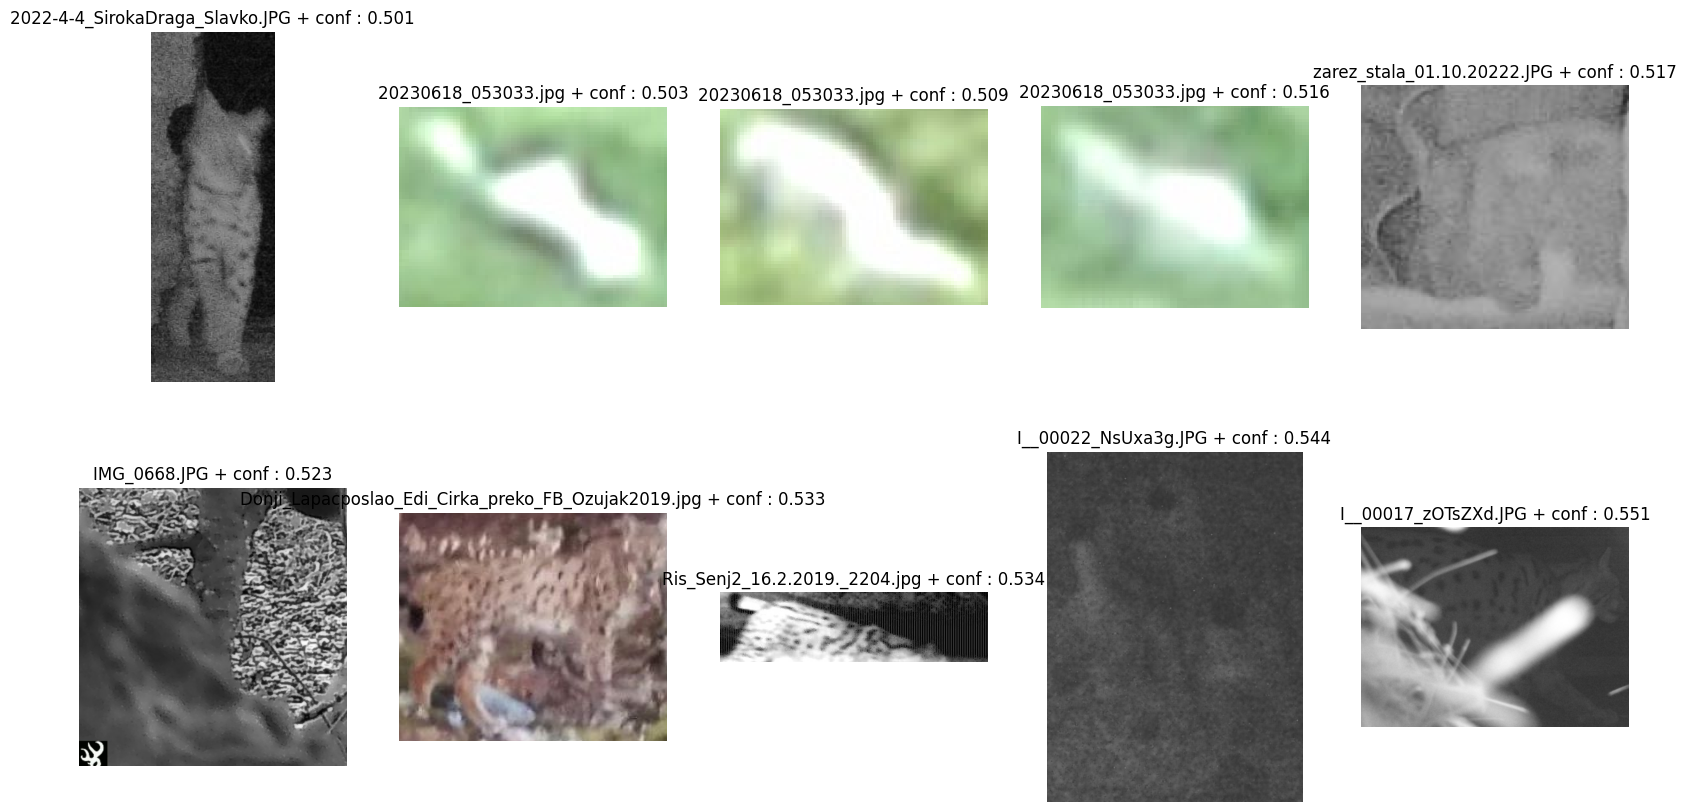

In [39]:
plot_images_conf(df_bbox_croatia_single_detection, by="smallest")

#### 10 images cropped with the largest confidence are displayed

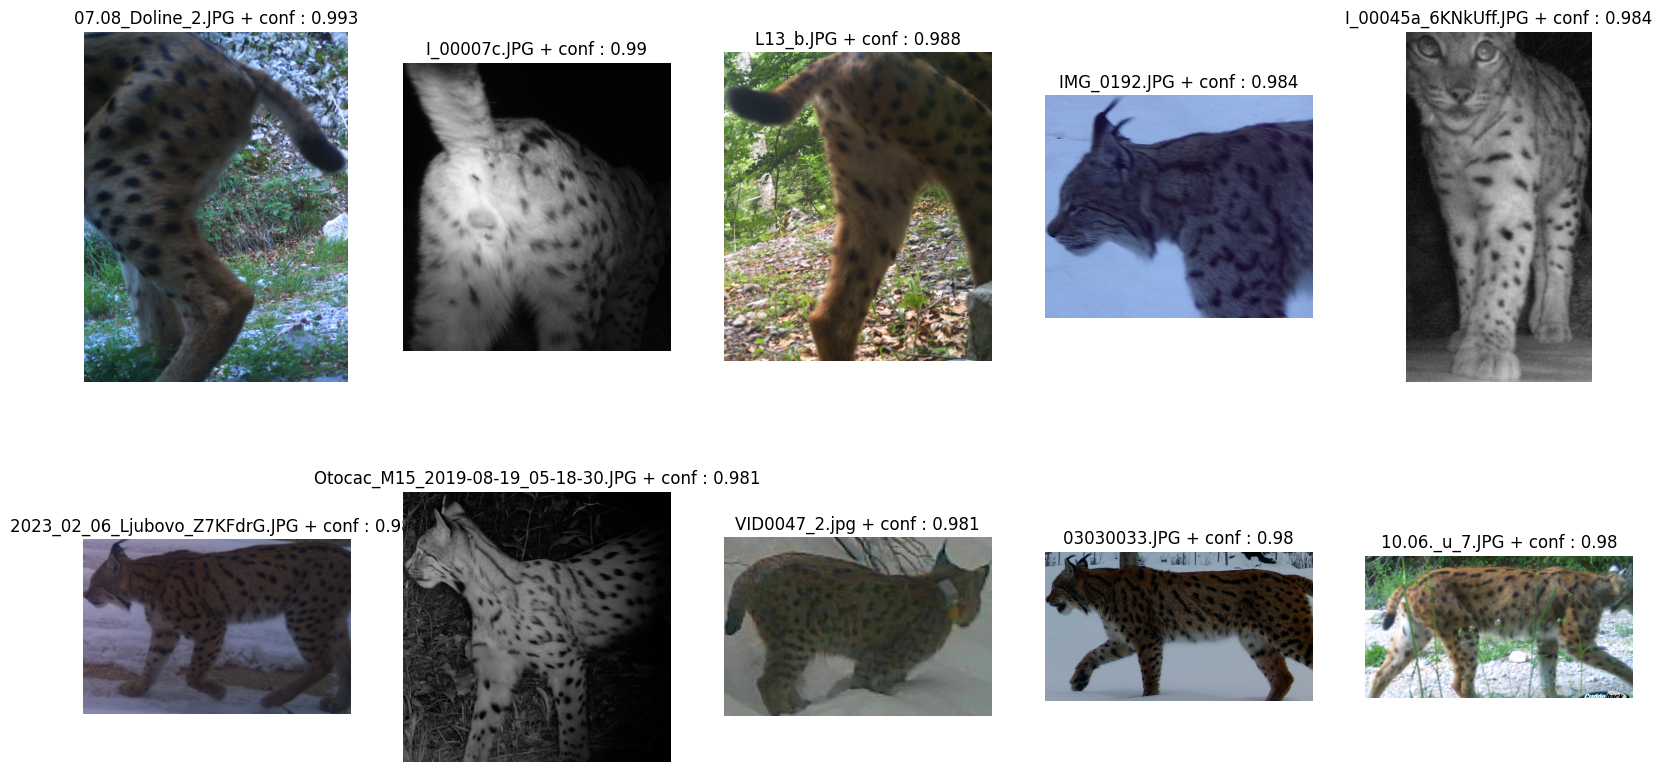

In [40]:
plot_images_conf(df_bbox_croatia_single_detection, by="largest")

In [42]:
df_croatia_with_bbox = pd.merge(df_croatia, df_bbox_croatia_single_detection[['file', 'conf', 'x', 'y', 'width', 'height']], how='inner', left_on='filepath', right_on='file')
df_croatia_with_bbox = df_croatia_with_bbox.drop('file', axis=1)

df_croatia_with_bbox

date  number_animals  number_children  \
0    2016-05-19 01:15:00               1                0   
1    2016-10-22 03:18:00               1                0   
2    2016-10-23 11:35:00               1                0   
3    2013-12-10 10:21:00               1                0   
4    2014-09-13 17:49:00               1                0   
...                  ...             ...              ...   
1677 2023-04-20 00:02:00               1                0   
1678 2023-05-11 12:40:00               1                0   
1679 2023-05-13 18:06:00               1                0   
1680 2022-04-05 05:31:00               1                0   
1681 2023-11-06 07:19:00               1                0   

                                               filepath        lynx_id  \
0     /gpfsscratch/rech/ads/commun/datasets/extracte...  Varošina 2016   
1     /gpfsscratch/rech/ads/commun/datasets/extracte...  Goran ZIP L09   
2     /gpfsscratch/rech/ads/commun/datasets/extracte...  Goran ZIP L09   
3     /gpfsscratch/rech/ads/commun/datasets/extracte...        Pakleni   
4     /gpfsscratch/rech/ads/commun/datasets/extracte...            Nik   
...                                                 ...            ...   
1677  /gpfsscratch/rech/ads/commun/datasets/extracte...     Slavko L35   
1678  /gpfsscratch/rech/ads/commun/datasets/extracte...     Slavko L35   
1679  /gpfsscratch/rech/ads/commun/datasets/extracte...     Slavko L35   
1680  /gpfsscratch/rech/ads/commun/datasets/extracte...          Vilim   
1681  /gpfsscratch/rech/ads/commun/datasets/extracte...  Crno jezero 2   

                     source      sex   side   latitude  longitude   conf  \
0          Geonatura d.o.o.  Unknown  right  15.439715  44.630702  0.932   
1                JU Priroda        M   left  14.910703  45.232780  0.915   
2                JU Priroda        M  right  14.910703  45.232780  0.944   
3              NP Paklenica  Unknown   none  15.482900  44.327941  0.822   
4              NP Paklenica  Unknown   left  15.479207  44.339898  0.936   
...                     ...      ...    ...        ...        ...    ...   
1677  Veterinarski fakultet        M   left  14.949509  45.144032  0.951   
1678  Veterinarski fakultet        M   left  14.949509  45.144032  0.840   
1679  Veterinarski fakultet        M   left  14.949509  45.144032  0.897   
1680             PP Velebit        M   left  15.043362  44.881497  0.952   
1681  Veterinarski fakultet        Z   left  15.248860  44.828308  0.924   

               x          y      width    height  
0     1068.94080   895.8000   440.8992  272.0000  
1      707.94240   645.8496   848.7424  551.8656  
2      197.99296   768.9792  1275.9296  761.7984  
3     1168.92160   702.8736   626.8416  245.8368  
4     1396.73600   874.7904   571.9296  660.8448  
...          ...        ...        ...       ...  
1677   736.00000   483.9600   245.9200  255.9600  
1678   873.92000   438.0000   112.0000  327.0000  
1679   752.96000   486.0000   232.9600  248.8800  
1680   256.96000  1865.7000   734.8000  773.7000  
1681   665.98350   409.9440   362.9730  191.9365  

[1682 rows x 15 columns]

#### Bounding box confidence distribution

<Axes: xlabel='conf', ylabel='Count'>

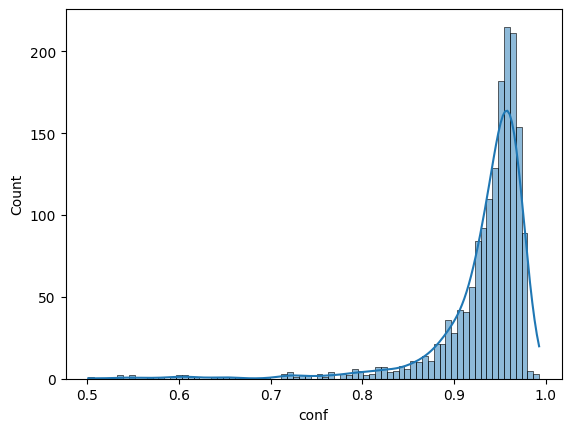

In [43]:
sns.histplot(df_croatia_with_bbox["conf"], kde=True)

#### Compute `image_number` for each individual

This number is no longer the same as initially following filtering, particularly of images with no bounding box detected, for example.

In [44]:
df_croatia_with_bbox['image_number'] = df_croatia_with_bbox.groupby('lynx_id').cumcount() + 1
df_croatia_with_bbox

date  number_animals  number_children  \
0    2016-05-19 01:15:00               1                0   
1    2016-10-22 03:18:00               1                0   
2    2016-10-23 11:35:00               1                0   
3    2013-12-10 10:21:00               1                0   
4    2014-09-13 17:49:00               1                0   
...                  ...             ...              ...   
1677 2023-04-20 00:02:00               1                0   
1678 2023-05-11 12:40:00               1                0   
1679 2023-05-13 18:06:00               1                0   
1680 2022-04-05 05:31:00               1                0   
1681 2023-11-06 07:19:00               1                0   

                                               filepath        lynx_id  \
0     /gpfsscratch/rech/ads/commun/datasets/extracte...  Varošina 2016   
1     /gpfsscratch/rech/ads/commun/datasets/extracte...  Goran ZIP L09   
2     /gpfsscratch/rech/ads/commun/datasets/extracte...  Goran ZIP L09   
3     /gpfsscratch/rech/ads/commun/datasets/extracte...        Pakleni   
4     /gpfsscratch/rech/ads/commun/datasets/extracte...            Nik   
...                                                 ...            ...   
1677  /gpfsscratch/rech/ads/commun/datasets/extracte...     Slavko L35   
1678  /gpfsscratch/rech/ads/commun/datasets/extracte...     Slavko L35   
1679  /gpfsscratch/rech/ads/commun/datasets/extracte...     Slavko L35   
1680  /gpfsscratch/rech/ads/commun/datasets/extracte...          Vilim   
1681  /gpfsscratch/rech/ads/commun/datasets/extracte...  Crno jezero 2   

                     source      sex   side   latitude  longitude   conf  \
0          Geonatura d.o.o.  Unknown  right  15.439715  44.630702  0.932   
1                JU Priroda        M   left  14.910703  45.232780  0.915   
2                JU Priroda        M  right  14.910703  45.232780  0.944   
3              NP Paklenica  Unknown   none  15.482900  44.327941  0.822   
4              NP Paklenica  Unknown   left  15.479207  44.339898  0.936   
...                     ...      ...    ...        ...        ...    ...   
1677  Veterinarski fakultet        M   left  14.949509  45.144032  0.951   
1678  Veterinarski fakultet        M   left  14.949509  45.144032  0.840   
1679  Veterinarski fakultet        M   left  14.949509  45.144032  0.897   
1680             PP Velebit        M   left  15.043362  44.881497  0.952   
1681  Veterinarski fakultet        Z   left  15.248860  44.828308  0.924   

               x          y      width    height  image_number  
0     1068.94080   895.8000   440.8992  272.0000             1  
1      707.94240   645.8496   848.7424  551.8656             1  
2      197.99296   768.9792  1275.9296  761.7984             2  
3     1168.92160   702.8736   626.8416  245.8368             1  
4     1396.73600   874.7904   571.9296  660.8448             1  
...          ...        ...        ...       ...           ...  
1677   736.00000   483.9600   245.9200  255.9600            59  
1678   873.92000   438.0000   112.0000  327.0000            60  
1679   752.96000   486.0000   232.9600  248.8800            61  
1680   256.96000  1865.7000   734.8000  773.7000            89  
1681   665.98350   409.9440   362.9730  191.9365             8  

[1682 rows x 16 columns]

In [45]:
df_croatia_with_bbox.to_csv("/gpfsscratch/rech/ads/commun/datasets/extracted/croatia/lynx_dataset_croatia.csv", index=False)

## Merge the two dataframes

In [46]:
df_full = pd.concat([df_france_with_bbox, df_croatia_with_bbox], ignore_index=True)
df_full

filepath        lynx_id  \
0     /gpfsscratch/rech/ads/commun/datasets/extracte...       Van-Gogh   
1     /gpfsscratch/rech/ads/commun/datasets/extracte...       Van-Gogh   
2     /gpfsscratch/rech/ads/commun/datasets/extracte...       Van-Gogh   
3     /gpfsscratch/rech/ads/commun/datasets/extracte...       Van-Gogh   
4     /gpfsscratch/rech/ads/commun/datasets/extracte...       Van-Gogh   
...                                                 ...            ...   
4790  /gpfsscratch/rech/ads/commun/datasets/extracte...     Slavko L35   
4791  /gpfsscratch/rech/ads/commun/datasets/extracte...     Slavko L35   
4792  /gpfsscratch/rech/ads/commun/datasets/extracte...     Slavko L35   
4793  /gpfsscratch/rech/ads/commun/datasets/extracte...          Vilim   
4794  /gpfsscratch/rech/ads/commun/datasets/extracte...  Crno jezero 2   

                     source pattern                date location  \
0                       OCS      NA 2012-04-27 00:00:00       NA   
1                       OCS      NA 2012-05-05 00:00:00       NA   
2                       OCS      NA 2012-03-17 00:00:00       NA   
3                       OCS      NA 2012-03-16 00:00:00       NA   
4                       OCS      NA 2012-03-05 00:00:00       NA   
...                     ...     ...                 ...      ...   
4790  Veterinarski fakultet     NaN 2023-04-20 00:02:00      NaN   
4791  Veterinarski fakultet     NaN 2023-05-11 12:40:00      NaN   
4792  Veterinarski fakultet     NaN 2023-05-13 18:06:00      NaN   
4793             PP Velebit     NaN 2022-04-05 05:31:00      NaN   
4794  Veterinarski fakultet     NaN 2023-11-06 07:19:00      NaN   

      image_number   conf          x          y     width     height  \
0                1  0.938   854.8416  1054.8000  558.8352   289.0000   
1                2  0.894   906.8544   948.9312  997.7472  1628.8128   
2                3  0.939  1192.8384   821.8000  743.9040   465.8000   
3                4  0.965   834.8832   673.8000  594.8640   518.8000   
4                5  0.970   765.9080   315.9860  568.8540   392.9500   
...            ...    ...        ...        ...       ...        ...   
4790            59  0.951   736.0000   483.9600  245.9200   255.9600   
4791            60  0.840   873.9200   438.0000  112.0000   327.0000   
4792            61  0.897   752.9600   486.0000  232.9600   248.8800   
4793            89  0.952   256.9600  1865.7000  734.8000   773.7000   
4794             8  0.924   665.9835   409.9440  362.9730   191.9365   

      number_animals  number_children  sex  side   latitude  longitude  
0                NaN              NaN  NaN   NaN        NaN        NaN  
1                NaN              NaN  NaN   NaN        NaN        NaN  
2                NaN              NaN  NaN   NaN        NaN        NaN  
3                NaN              NaN  NaN   NaN        NaN        NaN  
4                NaN              NaN  NaN   NaN        NaN        NaN  
...              ...              ...  ...   ...        ...        ...  
4790             1.0              0.0    M  left  14.949509  45.144032  
4791             1.0              0.0    M  left  14.949509  45.144032  
4792             1.0              0.0    M  left  14.949509  45.144032  
4793             1.0              0.0    M  left  15.043362  44.881497  
4794             1.0              0.0    Z  left  15.248860  44.828308  

[4795 rows x 18 columns]

<Axes: xlabel='conf', ylabel='Count'>

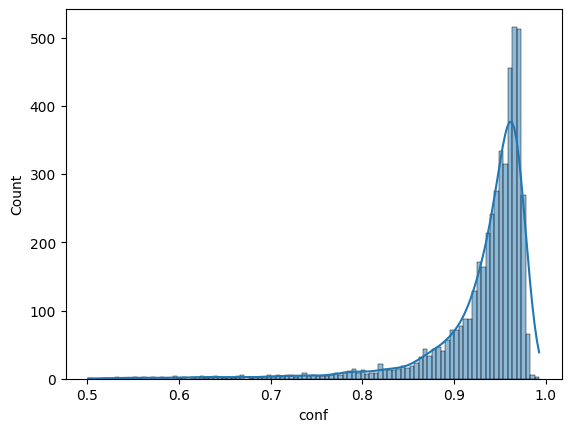

In [47]:
sns.histplot(df_full["conf"], kde=True)

In [48]:
df_full.to_csv("/gpfsscratch/rech/ads/commun/datasets/extracted/lynx_dataset_full.csv", index=False)